In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
mnist_train = datasets.MNIST(root = "./dataset", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root = "./dataset", train=False, transform=transforms.ToTensor(), download=True)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

F = nn.Sequential(
    nn.Linear(28*28, 128, device = device),
    nn.ReLU(),
    nn.Linear(128,64, device = device),
    nn.ReLU(),
    nn.Linear(64,10, device = device),
    nn.Sigmoid()
    ##nn.ReLU(),
    ##nn.LogSoftmax(dim = 1)
)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(F.parameters(), lr = 0.1)
epoch = 200

for e in range(epoch) :
    batch_size = 100
    batch = numpy.random.randint(0,len(mnist_train),(batch_size))
    x = []
    t = []
    for b in batch :
        x.append(mnist_train[b][0].reshape(28*28).to(device))
        t.append(torch.tensor(mnist_train[b][1],dtype = torch.long, device = device))

    loss_sum = 0
    for i in range(batch_size) :
        y = F(x[i])
        loss = loss_function(y, t[i])
        loss_sum += loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if (e+1) % 10 == 0 :
        print("epoch {} | loss {}".format(e+1, loss_sum / batch_size))

epoch 10 | loss 1.7517651319503784
epoch 20 | loss 1.7023319005966187
epoch 30 | loss 1.6985894441604614
epoch 40 | loss 1.6460833549499512
epoch 50 | loss 1.6775301694869995
epoch 60 | loss 1.6071628332138062
epoch 70 | loss 1.628877878189087
epoch 80 | loss 1.6044081449508667
epoch 90 | loss 1.5625354051589966
epoch 100 | loss 1.5759717226028442
epoch 110 | loss 1.5897244215011597
epoch 120 | loss 1.55716872215271
epoch 130 | loss 1.5535075664520264
epoch 140 | loss 1.5344178676605225
epoch 150 | loss 1.539804220199585
epoch 160 | loss 1.5931015014648438
epoch 170 | loss 1.5815370082855225
epoch 180 | loss 1.588720679283142
epoch 190 | loss 1.5593032836914062
epoch 200 | loss 1.5614742040634155


In [5]:
cnt = 0;
for i in range(len(mnist_test)) :
    x = mnist_test[i][0].reshape(28*28).to(device)
    t = mnist_test[i][1]
    y = F(x)
    if torch.argmax(y) == t :
        cnt = cnt + 1

print("correct_posibility : %f" %(cnt / len(mnist_test)))
torch.save(F,"MNIST2.pt")

correct_posibility : 0.893400


tensor(1)


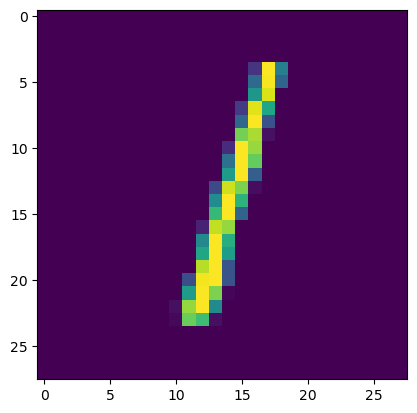

In [6]:
#F = torch.load("MNIST.pt", weights_only = False)

img = mnist_test[2][0].reshape(28,28)
plt.imshow(img)

y_array = F(img.reshape(1,28*28))
print(torch.argmax( y_array))